# Chi-Squared Test

## Import Modules

In [1]:
from scipy import stats
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read in Data and Clean

In [2]:
loansData = pd.read_csv('https://github.com/Thinkful-Ed/curric-data-001-data-sets/raw/master/loans/loansData.csv')
loansData.dropna(inplace=True)

## Summary Statistics

In [6]:
freq = collections.Counter(loansData['Open.CREDIT.Lines'])
unique = len(set(freq)) # counts unique values in a set
mode = stats.mode(loansData['Open.CREDIT.Lines'])

In [7]:
print(freq)

Counter({8.0: 262, 9.0: 237, 6.0: 232, 7.0: 216, 11.0: 187, 10.0: 185, 13.0: 158, 5.0: 153, 12.0: 153, 14.0: 138, 4.0: 106, 15.0: 96, 16.0: 66, 3.0: 60, 17.0: 58, 18.0: 51, 19.0: 30, 21.0: 26, 2.0: 24, 20.0: 23, 23.0: 11, 22.0: 8, 24.0: 7, 25.0: 4, 26.0: 3, 31.0: 1, 34.0: 1, 36.0: 1, 38.0: 1})


In [8]:
print(unique)

29


In [9]:
print(mode)

ModeResult(mode=array([ 8.]), count=array([262]))


### There are 29 unique values for number of credit lines, with 8 being the most frequent value. 

## Inspect Data Visually

/Users/amybrown/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


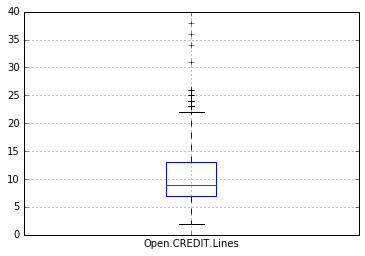

In [10]:
loansData.boxplot(column='Open.CREDIT.Lines')
plt.show()

### The boxplot shows some extreme values at the upper end of the distribution, making it appear right-skewed. There is a median number of approximately 8 credit lines.

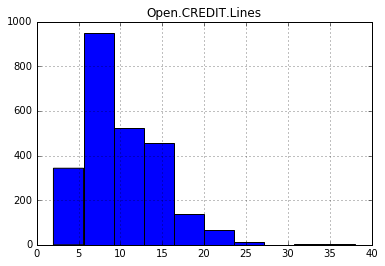

In [11]:
loansData.hist(column='Open.CREDIT.Lines')
plt.show()

### The histogram confirms the long right tail. 

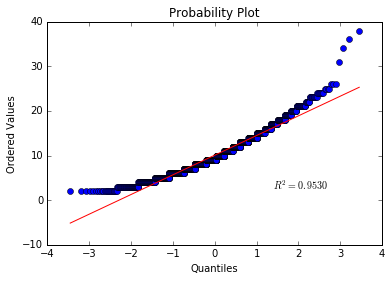

In [12]:
plt.figure()
graph = stats.probplot(loansData['Open.CREDIT.Lines'], dist='norm', plot=plt)
plt.show()

### The qq-plot also confirms the conclusion that the distribution if not normal and the outliers at the upper end of the distribution. 

In [13]:
chi, p = stats.chisquare(list(freq.values()))

In [14]:
print(chi)
print(p)

2408.43314652
0.0


### The p-value of <.01 indicates the chi-square test result was significant. 